<a href="https://colab.research.google.com/github/GaneshKannanOfficial/BitcoinPrice_Prediction/blob/main/BitCoin_ARIMA_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
ADF Statistic: -1.4270914716127074
p-value: 0.5692214412777963
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54138.282, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54136.578, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54136.403, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54136.450, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54135.244, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.724 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3352
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -27066.622
Date:                Mon, 20 Nov 2023   AIC                          54135.244
Time:                        02:35:24   BIC                          54141.361
Sample:           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


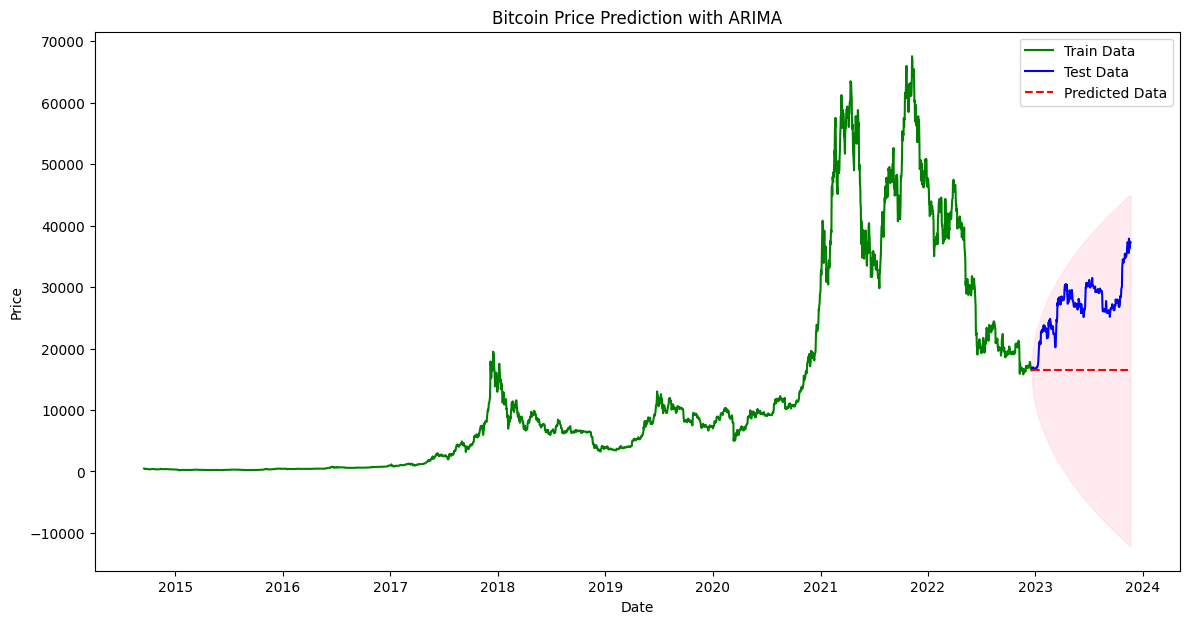

In [3]:
# Make sure to install the necessary libraries before running the code.
# You can install them using pip:
# pip install yfinance numpy pandas matplotlib statsmodels pmdarima sklearn

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Download BTC-USD data from Yahoo Finance
df = yf.download('BTC-USD', start='2010-01-01')

# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(df['Adj Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Using auto_arima to find the best ARIMA model parameters
stepwise_fit = auto_arima(df['Adj Close'], start_p=1, start_q=1,
                          max_p=5, max_q=5, m=1,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

# Print the summary of the best ARIMA model
print(stepwise_fit.summary())

# Separate training and test data
row = int(len(df) * 0.9)
train_data = df['Adj Close'][:row]
test_data = df['Adj Close'][row:]

# Fit the ARIMA model with the best parameters
model = ARIMA(train_data, order=stepwise_fit.order)
model_fit = model.fit()

# Forecast the prices
forecast = model_fit.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Train Data', color='green')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Predicted Data', color='red', linestyle='dashed')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Bitcoin Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


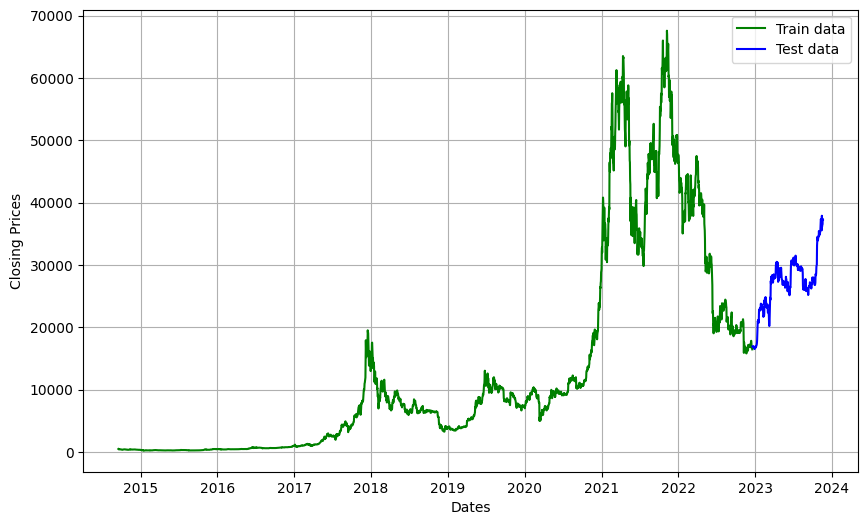

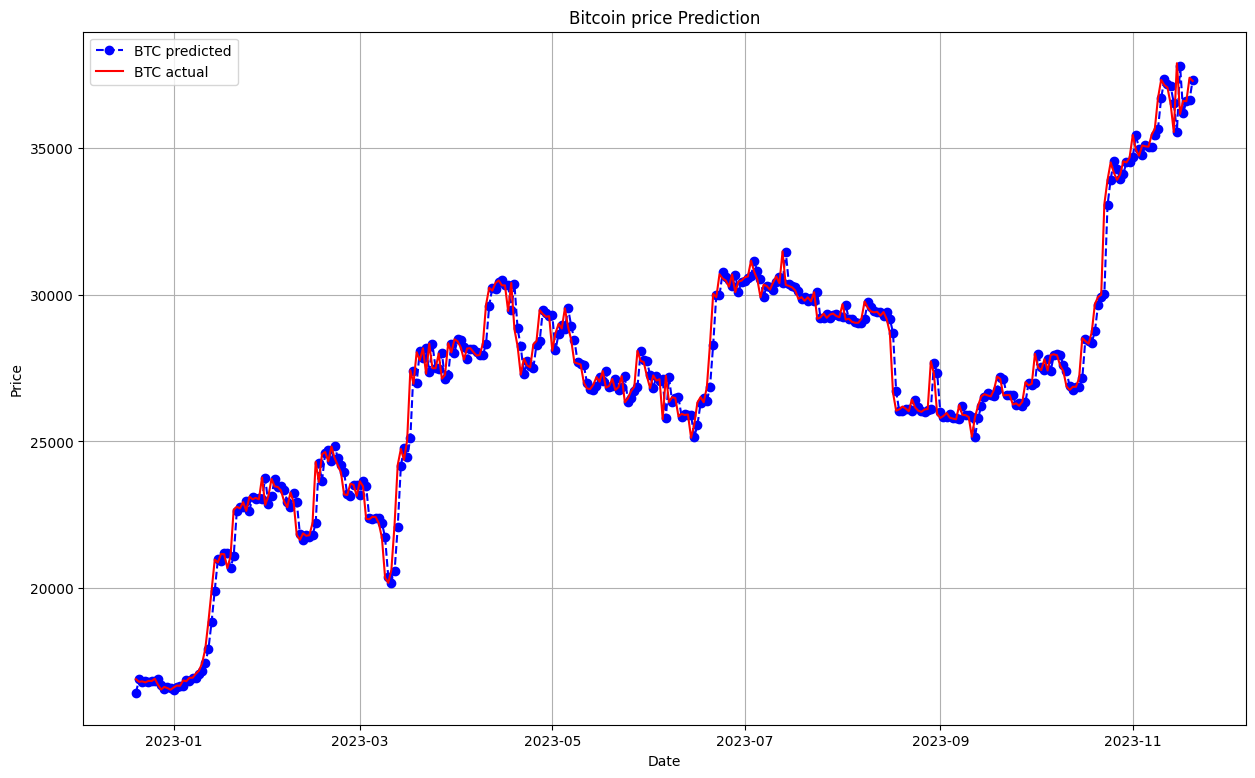

In [6]:
import yfinance as yf
df = yf.download('BTC-USD')
import numpy as np,pandas as pd,matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

row = int(len(df)*0.9)
train_data = list(df[0:row]['Adj Close'])
test_data = list(df[row:]['Adj Close'])

plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df.index[0:row],train_data,'green',label='Train data')
plt.plot(df.index[row:],test_data,'blue',label='Test data')
plt.legend()

model_pred = []
n_test = len(test_data)

for i in range(n_test):
  model = ARIMA(train_data,order=(4,1,0))
  model_fit = model.fit()
  out = model_fit.forecast()
  y_pred = out[0]
  model_pred.append(y_pred)
  test_val = test_data[i]
  train_data.append(test_val)

plt.figure(figsize = (15,9))
plt.grid(True)
data_range = df.index[row:]
plt.plot(data_range,model_pred,color='blue',marker='o',linestyle='dashed',label = 'BTC predicted')
plt.plot(data_range,test_data,color='red',label = 'BTC actual')
plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Download BTC-USD data from Yahoo Finance
df = yf.download('BTC-USD')

# Define the training and testing data
row = int(len(df)*0.9)
train_data = list(df[0:row]['Adj Close'])
test_data = list(df[row:]['Adj Close'])

# Initialize and fit the ARIMA model
model_pred = []
n_test_obs = len(test_data)

for i in range(n_test_obs):
    model = ARIMA(train_data, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_pred.append(yhat)
    train_data.append(test_data[i])




[*********************100%%**********************]  1 of 1 completed


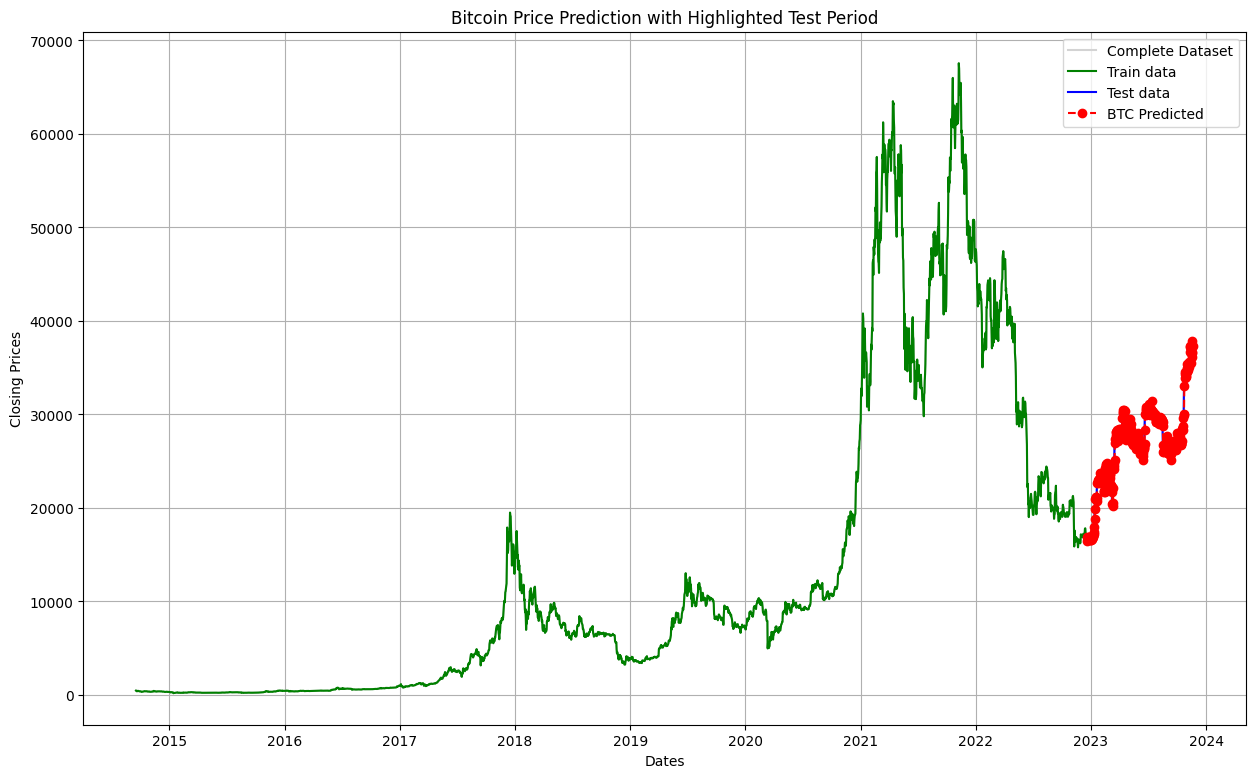

In [8]:
# Plot the complete dataset
plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Adj Close'], label='Complete Dataset', color='lightgrey')

# Plot the training data
plt.plot(df.index[0:row], train_data[:row], 'green', label='Train data')

# Plot the test data and predicted values with the highlighted area
data_range = df.index[row:]
plt.plot(data_range, test_data, color='blue', label='Test data')
plt.plot(data_range, model_pred, color='red', marker='o', linestyle='dashed', label='BTC Predicted')
plt.fill_between(data_range, test_data, model_pred, color='pink', alpha=0.3)

# Add title and legend
plt.title('Bitcoin Price Prediction with Highlighted Test Period')
plt.legend()
plt.show()